In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def k1(x, y, G, M):
    return (-G*M*x)/np.power((x**2+y**2), 3/2)

def l1(x, y, G, M):
    return (-G*M*y)/np.power((x**2+y**2), 3/2)

def k2(u, v):
    return u

def l2(u, v):
    return v

In [3]:
# méthode de Runge-Kutta d'ordre 2
def fct_RK2_2D(x0, y0, x_prime0, y_prime0, tmin, tmax, pas, beta, K1, K2, L1, L2, G, M):
    """
    Implémente la méthode de Runge-Kutta d'ordre 2 pour un système d'équations différentielles en 2D.

    Arguments :
    - x0, y0, x_prime0, y_prime0 : conditions initiales (valeurs de x et y à t = tmin)
    - tmin : début de l'intervalle de temps
    - tmax : fin de l'intervalle de temps
    - pas : pas de discrétisation
    - beta : paramètre de la méthode RK2 (typique : beta=0.5 pour RK classique)
    - K1 : fonction K1(x, y, G, M) définissant l'accélération en x
    - L1 : fonction L1(x, y, G, M) définissant l'accélération en y
    - K2 : fonction K2(u, v) définissant la vitesse en x
    - L2 : fonction L2(u, v) définissant la vitesse en y

    Retourne :
    - x : tableau des valeurs de x(t)
    - y : tableau des valeurs de y(t)
    - t : tableau des instants de temps
    """
    t = np.arange(tmin, tmax+pas, pas)

    # Initialisation des positions et vitesses
    x = np.zeros(len(t))
    y = np.zeros(len(t))
    x[0] = x0
    y[0] = y0

    # Initialisation des vitesses
    u = np.zeros(len(t))
    v = np.zeros(len(t))
    u[0] = x_prime0
    v[0] = y_prime0

    for k in range(1, len(t)):
        # 1. Calculer les accélérations au point actuel
        k1u = K1(x[k-1], y[k-1], G, M)  # Accélération en x
        k1v = L1(x[k-1], y[k-1], G, M)  # Accélération en y

        # 2. Calculer les vitesses au point actuel
        k1x = K2(u[k-1], v[k-1])  # Vitesse en x
        k1y = L2(u[k-1], v[k-1])  # Vitesse en y

        # 3. Calculer les positions et vitesses intermédiaires avec pas/(2*beta)
        x_mid = x[k-1] + (pas/(2*beta))*k1x
        y_mid = y[k-1] + (pas/(2*beta))*k1y
        u_mid = u[k-1] + (pas/(2*beta))*k1u
        v_mid = v[k-1] + (pas/(2*beta))*k1v

        # 4. Calculer les dérivées aux points intermédiaires
        k2u = K1(x_mid, y_mid, G, M)
        k2v = L1(x_mid, y_mid, G, M)
        k2x = K2(u_mid, v_mid)
        k2y = L2(u_mid, v_mid)

        # 5. Mettre à jour les positions et vitesses
        x[k] = x[k-1] + pas*((1-beta)*k1x + beta*k2x)
        y[k] = y[k-1] + pas*((1-beta)*k1y + beta*k2y)
        u[k] = u[k-1] + pas*((1-beta)*k1u + beta*k2u)
        v[k] = v[k-1] + pas*((1-beta)*k1v + beta*k2v)

    return x, y, t, u, v

# méthode de Runge-Kutta d'ordre 4
def fct_RK4_2D(x0, y0, x_prime0, y_prime0, tmin, tmax, pas, beta, K1, K2, L1, L2, G, M):
    """
    Implémente la méthode de Runge-Kutta d'ordre 2 pour un système d'équations différentielles en 2D.

    Arguments :
    - x0, y0, x_prime0, y_prime0 : conditions initiales (valeurs de x et y à t = tmin)
    - tmin : début de l'intervalle de temps
    - tmax : fin de l'intervalle de temps
    - pas : pas de discrétisation
    - beta : paramètre de la méthode RK2 (typique : beta=0.5 pour RK classique)
    - K1 : fonction K1(x, y, G, M) définissant l'accélération en x
    - L1 : fonction L1(x, y, G, M) définissant l'accélération en y
    - K2 : fonction K2(u, v) définissant la vitesse en x
    - L2 : fonction L2(u, v) définissant la vitesse en y

    Retourne :
    - x : tableau des valeurs de x(t)
    - y : tableau des valeurs de y(t)
    - t : tableau des instants de temps
    """
    t = np.arange(tmin, tmax+pas, pas)

    # Initialisation des positions et vitesses
    x = np.zeros(len(t))
    y = np.zeros(len(t))
    x[0] = x0
    y[0] = y0

    # Initialisation des vitesses
    u = np.zeros(len(t))
    v = np.zeros(len(t))
    u[0] = x_prime0
    v[0] = y_prime0

    for k in range(1, len(t)):
        k1u = K1(x[k-1], y[k-1], G, M)
        k1v = L1(x[k-1], y[k-1], G, M)

        k1x = K2(u[k-1], v[k-1])
        k1y = L2(u[k-1], v[k-1])

        k2u = K1(x[k-1] + (pas/2)*k1x, y[k-1] + (pas/2)*k1y, G, M)
        k2v = L1(x[k-1] + (pas/2)*k1x, y[k-1] + (pas/2)*k1y, G, M)

        k2x = K2(u[k-1] + (pas/2)*k1u, v[k-1] + (pas/2)*k1v)
        k2y = L2(u[k-1] + (pas/2)*k1u, v[k-1] + (pas/2)*k1v)

        k3u = K1(x[k-1] + (pas/2)*k2x, y[k-1] + (pas/2)*k2y, G, M)
        k3v = L1(x[k-1] + (pas/2)*k2x, y[k-1] + (pas/2)*k2y, G, M)

        k3x = K2(u[k-1] + (pas/2)*k2u, v[k-1] + (pas/2)*k2v)
        k3y = L2(u[k-1] + (pas/2)*k2u, v[k-1] + (pas/2)*k2v)

        k4u = K1(x[k-1] + pas*k3x, y[k-1] + pas*k3y, G, M)
        k4v = L1(x[k-1] + pas*k3x, y[k-1] + pas*k3y, G, M)

        k4x = K2(u[k-1] + pas*k3u, v[k-1] + pas*k3v)
        k4y = L2(u[k-1] + pas*k3u, v[k-1] + pas*k3v)

        x[k] = x[k-1] + (pas/6)*(k1x + 2*k2x + 2*k3x + k4x)
        y[k] = y[k-1] + (pas/6)*(k1y + 2*k2y + 2*k3y+ k4y)
        u[k] = u[k-1] + (pas/6)*(k1u + 2*k2u+ 2*k3u + k4u)
        v[k] = v[k-1] + (pas/6)*(k1v+ 2*k2v+ 2*k3v + k4v)

    return x, y, t, u, v

In [ ]:
# Aire d'un triangle pour Loi des Aires de Kepler
def aire_triangle(a, b, c):
    """
    Calcule l'aire du triangle formé par trois points a, b, c.
    Chaque point est une liste ou un tableau [x, y].
    """
    x1, y1 = a
    x2, y2 = b
    x3, y3 = c
    aire = 0.5 * abs(x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2)) # Calcul déterminant
    return aire

# méthode d'Euler-Richardson
def fct_Euler_Richardson_2D(x0, y0, x_prime0, y_prime0, tmin, tmax, pas, K1, K2, L1, L2, G, M, seuil):
    """
    Implémente la méthode d'Euler-Richardson pour un système d'équations différentielles en 2D.

    Arguments :
    - x0, y0, x_prime0, y_prime0 : conditions initiales (valeurs de x et y à t = tmin)
    - tmin : début de l'intervalle de temps
    - tmax : fin de l'intervalle de temps
    - pas : pas de discrétisation
    - K1 : fonction K1(t, x, y) définissant l'équation différentielle du/dt = K1
    - L1 : fonction L1(t, x, y) définissant l'équation différentielle dv/dt = L1
    - K2 : fonction K2(t, u, v) définissant l'équation différentielle dx/dt = K2
    - L2 : fonction L2(t, u, v) définissant l'équation différentielle dy/dt = L2

    Retourne :
    - x : tableau des valeurs de x(t)
    - y : tableau des valeurs de y(t)
    - t : tableau des instants de temps
    """
    
    x = [x0]
    y =[y0]
    u = [x_prime0]
    v = [y_prime0]
    t = [tmin]
    
    i = 1
    while t[i-1]<tmax:
        epsilon = 0

        ku = K1(x[i-1],y[i-1], G, M)
        kv = L1(x[i-1],y[i-1], G, M)
        kx = K2(u[i-1],v[i-1])
        ky = L2(u[i-1],v[i-1])
        kpu = K1((x[i-1]+pas/2*kx),(y[i-1]+pas/2*ky), G, M)
        kpv = L1((x[i-1]+pas/2*kx),(y[i-1]+pas/2*ky), G, M)
        kpx = K2((u[i-1]+pas/2*ku),(v[i-1]+pas/2*kv))
        kpy = L2((u[i-1]+pas/2*ku),(v[i-1]+pas/2*kv))

        k = np.array([ku,kv,kx,ky])
        kp = np.array([kpu,kpv,kpx,kpy])
        for j in range(0,len(kp)):
            epsilon += (pas/2)*abs(kp[j]-k[j])    
        alpha = epsilon/seuil
        if alpha > 1:
            pas = 0.9*pas/np.sqrt(alpha)
        if alpha < 1:
            u.append(u[i-1] + kp[0]*pas)
            v.append(v[i-1] + kp[1]*pas)
            x.append(x[i-1] + kp[2]*pas)
            y.append(y[i-1] + kp[3]*pas)
            t.append(t[i-1] + pas)

            pas = 0.9*pas/np.sqrt(alpha)
            i+=1
        

        
    return x, y, t

def verifier_loi_aires(x, y, t, seuil=0.25):
    """
    Vérifie la loi des aires de Kepler en comparant l'aire des triangles successifs,
    en prenant en compte les intervalles de temps variables et la proportionnalité entre les aires et le temps.

    Arguments :
    - x, y : listes des positions en x et y de l'astre à chaque instant de temps
    - t : liste des instants de temps
    - seuil : tolérance pour l'égalité des aires

    Retourne :
    - sorted_errors : liste des erreurs les plus élevées (ordre décroissant) avec leurs instants de temps
    """
    aire_precedente = aire_triangle([0, 0], [x[0], y[0]], [x[1], y[1]])

    error_dict={}
    
    for i in range(1, len(t)-1):
        aire_courante = aire_triangle([0, 0], [x[i], y[i]], [x[i+1], y[i+1]])
        
        # Calcul des intervalles de temps
        delta_t = t[i] - t[i-1]
        if i > 1:
            delta_t_precedent = t[i-1] - t[i-2] 
        else:
            delta_t_precedent = delta_t  # Gérer le cas pour i=1
        
        # Rapport entre les intervalles de temps
        rapport_temps = abs(delta_t / delta_t_precedent)
        rapport_temps = 1

        # Comparaison des variations d'aire


        # Enregistrer l'erreur dans le dictionnaire
        erreur = abs(aire_courante - aire_precedente*rapport_temps) / (aire_precedente*rapport_temps)
        error_dict[t[i]] = erreur
        #print(t[i], i,"|",  erreur, seuil,"|", rapport_temps, delta_t, delta_t_precedent)
        # Comparer la variation d'aire et de temps
        if erreur > seuil:
            print(f"Violation de la loi des aires à t={t[i]}")
            return False
        
        aire_precedente = aire_courante
        
     # Trier les erreurs en ordre décroissant
    sorted_errors = sorted(error_dict.items(), key=lambda x: x[1], reverse=True)

    return sorted_errors

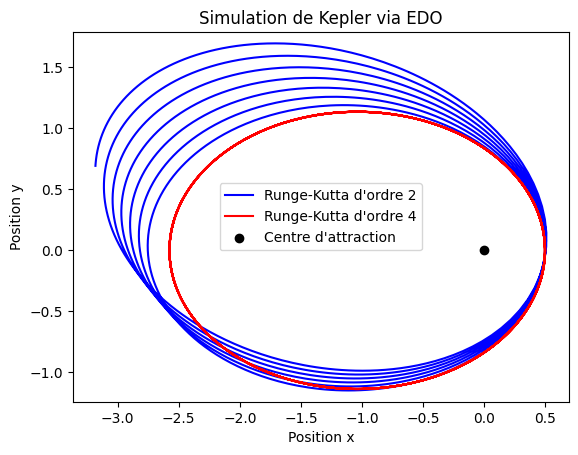

La loi des aires de Kepler est respectée.
Liste des erreurs les plus élevées (en %):
1. t = 5.69 : Erreur = 0.00063
2. t = 9.57 : Erreur = 0.00063
3. t = 1.94 : Erreur = 0.00063
4. t = 11.41 : Erreur = 0.00063
5. t = 3.85 : Erreur = 0.00063
6. t = 3.78 : Erreur = 0.00063
7. t = 13.32 : Erreur = 0.00063
8. t = 11.48 : Erreur = 0.00063
9. t = 7.60 : Erreur = 0.00063
10. t = 0.03 : Erreur = 0.00063
Première erreur en dessous de 5%
1/1499. t = 5.69 : Erreur = 0.00063


In [7]:
M_soleil = 1
G_temp = 4*(np.pi)**2
t_min = 0.0
t_max = 15
h = 0.01
x0 = 0.5  # position astre initiale (x)
y0 = 0  # position astre initiale (y)
x_prime0 = 0  # vitesse astre initiale (x)
y_prime0 = 11.5  # vitesse astre initiale (y)
beta_RK = 0.5

xRK2, yRK2, t, u, v = fct_RK2_2D(x0, y0, x_prime0, y_prime0, t_min, t_max, h, beta_RK, k1, k2, l1, l2, G_temp, M_soleil)
xRK4, yRK4, t, u_4, v_4 = fct_RK4_2D(x0, y0, x_prime0, y_prime0, t_min, t_max, h, beta_RK, k1, k2, l1, l2, G_temp, M_soleil)

# Labels et légende
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.title("Simulation de Kepler via EDO")
plt.grid()
plt.axis("equal")  # Pour conserver les proportions réelles

plt.figure(1)
plt.plot(xRK2, yRK2, label="Runge-Kutta d'ordre 2", linestyle="-", color="b")
plt.plot(xRK4, yRK4, label="Runge-Kutta d'ordre 4", linestyle="-", color="r")

# Ajouter le centre d'attraction (astre central)
plt.scatter(0, 0, color="black", marker="o", label="Centre d'attraction")

# Labels et légende
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.title("Simulation de Kepler via EDO")
plt.legend()
plt.grid()
plt.axis("equal")  # Pour conserver les proportions réelles

plt.show()

# Vérification de la loi des aires
output_aire = verifier_loi_aires(xRK4, yRK4, t)
if output_aire:
    print("La loi des aires de Kepler est respectée.")
    
    print("Liste des erreurs les plus élevées (en %):")
    for i, (temps, erreur) in enumerate(output_aire[:10], 1):
        print(f"{i}. t = {temps:.2f} : Erreur = {erreur:.5f}")
    i = 0
    while i<len(output_aire) and output_aire[i][1]>0.05:
        i+=1
    print("Première erreur en dessous de 5%")
    print(f"{i+1}/{len(output_aire)}. t = {output_aire[i][0]:.2f} : Erreur = {output_aire[i][1]:.5f}")
else:
    print("La loi des aires de Kepler n'est pas respectée.")